In [4]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np

In [6]:
df = pd.read_csv('reddit_posts_2022_04_12-03_12_51_PM_clean.csv', index_col=0)
preprocessed_reddit_titles = df['clean_title_unstemmed_without_numbers'].to_list()
preprocessed_reddit_titles_no_nan = df[df['clean_title_unstemmed_without_numbers'].isna()==False]['clean_title_unstemmed_with_numbers'].to_list()

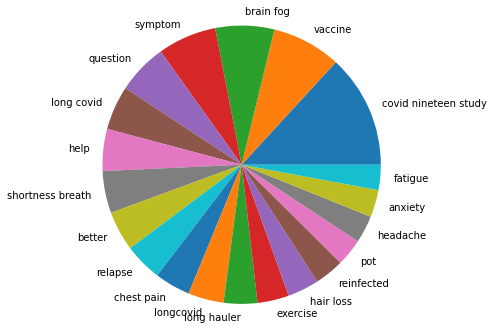

In [7]:
import collections

# Most commonly used titles
most_common_titles = collections.Counter(preprocessed_reddit_titles_no_nan).most_common(20)
plt.pie([x[1] for x in most_common_titles], labels = [x[0] for x in most_common_titles], radius=1.6)
plt.show()

In [8]:
from nltk import TweetTokenizer

tt = TweetTokenizer()
tokenized_titles = [tt.tokenize(title) for title in preprocessed_reddit_titles_no_nan]
tokenized_titles_flat = [word for title in tokenized_titles for word in title]

In [14]:
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text, stop_words):
    return " ".join([word for word in text if word not in stop_words])

## Clustering

In [9]:
import sys

sys.path.append("../utils/clustering")
sys.path.append("../utils/embedding")

In [12]:
from kmeans import plot_elbow
from kmeans import mbkmeans_clusters

from clustering_viz import tsne_viz
from create_embeddings import vectorize

#### TF-IDF + KMEANS

##### Optimal K with elbow method

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(preprocessed_reddit_titles_no_nan)

In [11]:
X.shape

(20537, 2062)

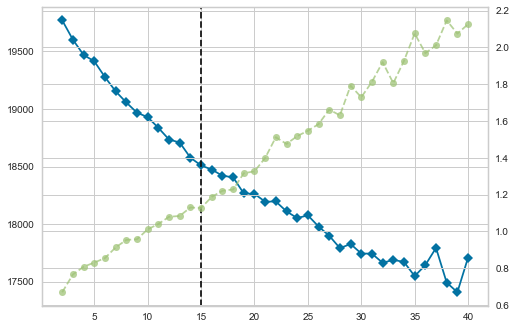

In [12]:
plot_elbow(X, k_range=(2, 41))

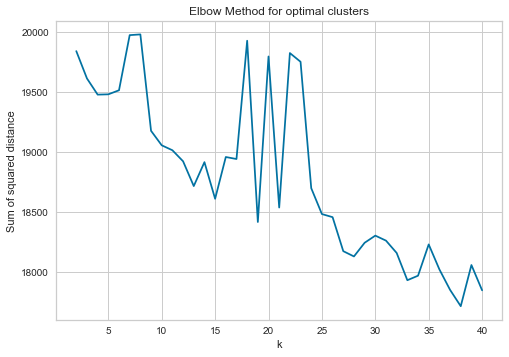

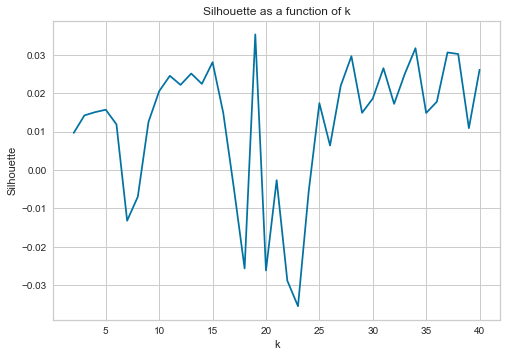

(MiniBatchKMeans(batch_size=1000, n_clusters=40, random_state=21),
 array([ 3, 39, 28, ..., 36, 24, 36]))

In [13]:
mbkmeans_clusters(X, k_range=range(2,41))

Silhouette score:
0.028029083106236963


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

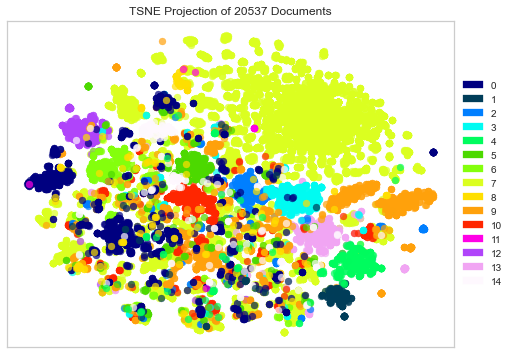

In [17]:
model, labels = mbkmeans_clusters(X, k_range=15)
df_clusters = pd.DataFrame({
    "text": preprocessed_reddit_titles_no_nan,
    "cluster": labels
})
tsne_viz(X, labels)

In [24]:
df_clusters[df_clusters['cluster'] == 7]['text'].to_list()

['safe food',
 'much exercise',
 'improve quite lot stop post',
 'lose 18lbs due longcovid start gain weight',
 'symptom debilitate still suck relate',
 'actually article scientific paper suggest long hauling anxiety',
 'drinking',
 'know cause twitch tremor',
 'recover daily low fever',
 'someone explain cure possible',
 'gi rumble noise',
 'impulsive intrusive thought',
 'exercise',
 'careful water kid',
 'claritin another antihistamine',
 'little better everyday',
 'video graphic bc007 mechanism',
 'want life back',
 'mental health',
 'pain',
 'weirdest neuro issue deal',
 'terrify delta afraid shot',
 'muscle spasm shoot pain',
 'omega colchicine',
 'thought treatment medication ampligen',
 'tempt end eat banana',
 'acid-refluxers rid acid re-flux',
 '22m extremely tired hope recovery',
 'right work flare whichever condition bos',
 'sexual dysfunction lose love life',
 'elimination diet experiment research plan result far',
 'deal physical limitation mental aspect longcovid cross p

In [25]:
df_clusters[df_clusters['cluster'] == 9]['text'].to_list()

['long covid study best clinical practice seminar replay sep 8) vax therapy neurology dysautonomia cardiology putrino labs mt sinai',
 'under-treating acute covid long hauling',
 'long covid constipation',
 'post covid autoimmune automonic dysfunction',
 'neurologist suggest migraine long covid pot think fit symptom',
 'doctor acknowledge covid longhauling',
 'covid affect hair nail',
 'long long post sorry chest',
 'random fever post covid',
 'severe disease initial infection covid nineteen',
 'anyone give colchicine post covid myocarditis pericarditis',
 'reinfected covid nineteen',
 'covid vax reinfected antibody count',
 'anybody reaction allegra covid',
 'stop smoke since covid',
 'covid hyperpots',
 'difference fibromyalgia pain pain long covid',
 'sound normal long covid hard time fine motor skill',
 'cure gut cure covid',
 'long covid activism america',
 'covid give anxiety panic attack depression',
 'nature publish study persistence long covid symptom',
 'duration long covid',

In [26]:
df_clusters[df_clusters['cluster'] == 0]['text'].to_list()

['anyone home hospital oxygen',
 'anyone sibo without major gut symtpoms issue',
 'anyone else suffer weird internal buzzing vibration feeling',
 'anyone post exertional malaise',
 'reoccurring rash anyone else',
 'anyone rheumatology',
 'anyone',
 'anyone experience symptom dimentia covid',
 'anyone else deal weird aggressive thought',
 'anyone similar',
 'anyone jaw tooth pain night',
 'anyone use nad',
 'constipation anyone',
 'high calcium low potassium anyone',
 'cyproheptadine anyone try insomnia issue',
 'anyone ace inhibitor arb',
 'anyone still experience chronic nose congestion year',
 'anyone fully recover give hope',
 'anyone fully recover give hope',
 'anyone else twenty still non-mild symptom',
 'anyone recover anxiety adrenaline panic attack',
 'anyone hereditary hemochromatosis mutation',
 'earth elevate cd3 cd25 lymph mean anyone else test',
 'anyone short term disability flair symptom',
 'anyone prescribe amoxicillin without negative side effect',
 'anyone sick year',

In [27]:
df_clusters[df_clusters['cluster'] == 3]['text'].to_list()

['multiple mri brain neck spine since long haul',
 'long haul symptom post first jab five month anitbody test show previous unknown covid infection',
 'long haul pot postural orthostatic tachycardia syndrome',
 'would vaccine know could prevent reduce long haul symptom',
 'condition cause long haul',
 'many previous covid long haul point time either finasteride isotretinoin accutane ssri',
 'long infection longcovid',
 'daily panic stand attack long haul symptom',
 'explanation covid long haul induced depression anxiety',
 'would new long haul covid',
 'covid nineteen timeline long haul recent infection',
 "anyone's hand eye coorindation improve throughout long haul",
 'long haul symptom without antibody',
 'start back college wonder happen catch covid plus vaccinate long haul worse',
 'anyone affect exertion mild long-haul',
 'pde four inhibitor implicate reduce inflammation acute phase covid infection question could researcher use long haul',
 'anybody else surprise long long haul',


In [28]:
df_clusters[df_clusters['cluster'] == 1]['text'].to_list()

['super random question',
 'question rest recovery vaccine',
 'question',
 'story question EMOT_JOY',
 'question exercise',
 'question',
 'question lumbrokinase treatment',
 'question microclotting',
 'question regard antibody test',
 'question lady period become painful',
 'little rant question',
 'delicate question guy loss morning erection',
 'question blood pressure pot stand',
 'question mod',
 'question 1st vaccine',
 'back quick question concert go-ers',
 'question early two thousand and twenty hauler',
 'tachycardia peep ask question',
 'question deal covid married',
 'heart rate question pot tachycardia',
 'question lc',
 'imp question lc despite antiviral remdesivir',
 'question woman',
 'question neurologist mri',
 'question 1st dose',
 'work issue question',
 'question',
 'please answer question',
 'serious question mind',
 'cardiovascular health question',
 'question anti-histamine treatment',
 'question guy',
 'multi system inflammatory syndrome question',
 'diet question

In [29]:
df_clusters[df_clusters['cluster'] == 2]['text'].to_list()

['constant headache pfizer vaccine',
 'vaccine birthday nervous need positive vaccine story',
 '2nd update tinnitus post vaccine shot',
 'gout flareup possible side effect vaccine',
 'anyone vaccine twice',
 'short hauler vaccine far',
 'anyone skip 2nd vaccine shot',
 'vaccine improvement',
 'vaccine rent',
 'please share vaccine experience',
 'vaccine long hauling',
 'vaccine',
 'vaccine recovery',
 'vaccine booster',
 'vaccine resolve symptom',
 'covid vaccine',
 'chance moderna vaccine today add update thread',
 'vaccine update',
 'vaccine story thus far',
 'vaccine thursday pretty nervous',
 'high ige level covid vaccine',
 'vaccine',
 'post vaccine blood clot',
 'long hauler thought vaccine vaccine',
 'tip 1st vaccine',
 'relapse gardasil hpv vaccine',
 'symptom worse 2nd vaccine dose',
 'non-covid vaccine experience',
 'immunosuppressant medication covid vaccine adverse reaction',
 'antibody vaccine breakthrough infection long last',
 'look insight regard vaccine',
 'vaccine lon

##### Return on some preprocessing: removal of stop words

In [18]:
import collections

# Most common words
collections.Counter(tokenized_titles_flat).most_common()

[('covid', 3115),
 ('long', 2257),
 ('anyone', 2234),
 ('symptom', 1664),
 ('month', 1149),
 ('help', 830),
 ('pain', 811),
 ('vaccine', 776),
 ('feel', 773),
 ('else', 745),
 ('post', 628),
 ('hauler', 617),
 ('haul', 586),
 ('test', 572),
 ('issue', 556),
 ('like', 552),
 ('brain', 548),
 ('longcovid', 523),
 ('experience', 499),
 ('heart', 427),
 ('fog', 421),
 ('recover', 408),
 ('recovery', 407),
 ('back', 394),
 ('day', 385),
 ('chest', 361),
 ('smell', 360),
 ('fatigue', 358),
 ('try', 332),
 ('blood', 327),
 ('work', 325),
 ('need', 317),
 ('question', 317),
 ('year', 316),
 ('better', 314),
 ('time', 311),
 ('still', 310),
 ('infection', 308),
 ('doctor', 291),
 ('pot', 288),
 ('week', 282),
 ('nineteen', 282),
 ('anxiety', 277),
 ('new', 271),
 ('taste', 268),
 ('relapse', 267),
 ('think', 265),
 ('advice', 264),
 ('positive', 263),
 ('people', 259),
 ('please', 258),
 ('know', 251),
 ('since', 241),
 ('worse', 238),
 ('anybody', 232),
 ('start', 228),
 ('update', 228),
 ('bo

In [15]:
# Extending the stop words list for titles
stop_words = stopwords.words('english')
stop_words.extend(['covid', 'longcovid', 'long', 'haul', 'lc', 'lh', 'anyone', 'symptom', 'help', 'please', 'nineteen', 'question', 'else', 'post', 'hauler', 'test', 'issue', 'feel', 'like' ])
# Removing the stop words
titles_without_stop_words = [remove_stopwords(title, stop_words) for title in tokenized_titles]
titles_without_stop_words = [title for title in titles_without_stop_words if title != '']

In [ ]:
# Creating new embeddings
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(titles_without_stop_words)

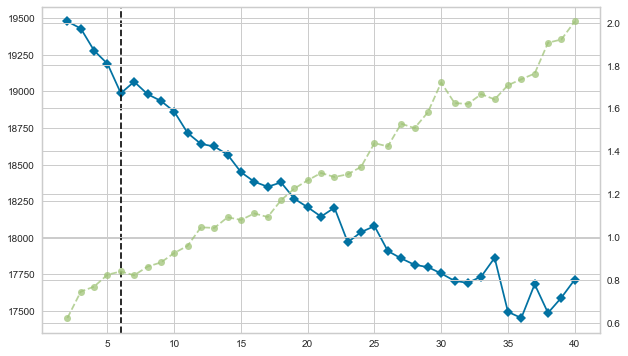

In [22]:
plot_elbow(X, k_range=(2, 41))

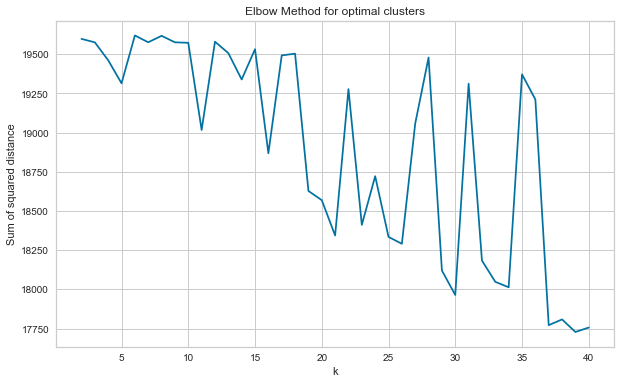

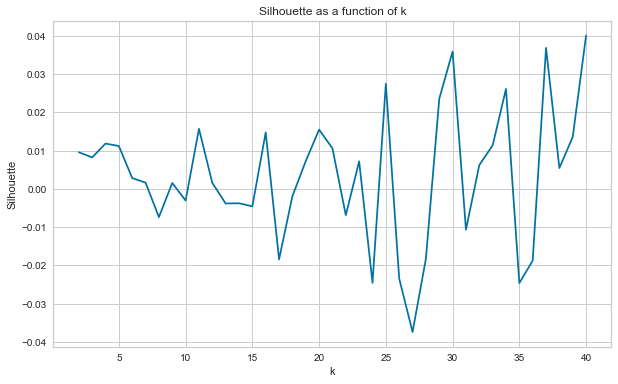

(MiniBatchKMeans(batch_size=1000, n_clusters=40, random_state=21),
 array([13, 30, 21, ..., 12,  0, 12]))

In [23]:
mbkmeans_clusters(X, k_range=range(2,41))

Silhouette score:
0.03681961727499976


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

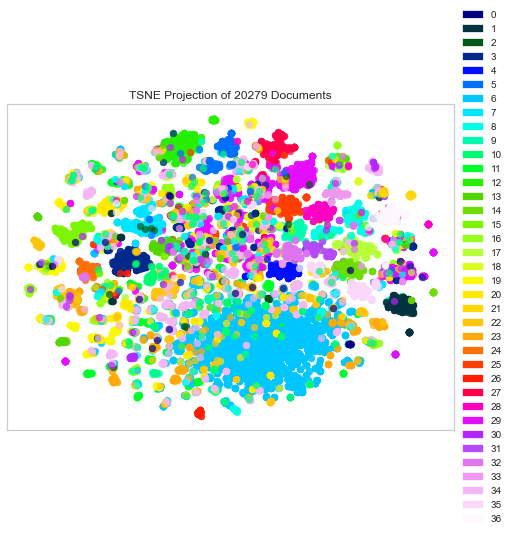

In [26]:
model, labels = mbkmeans_clusters(X, k_range=37)
df_clusters = pd.DataFrame({
    "text": titles_without_stop_words,
    "cluster": labels
})
tsne_viz(X, labels)

In [28]:
df_clusters[df_clusters['cluster'] == 6]['text'].to_list()

['improve quite lot stop',
 'actually article scientific paper suggest hauling anxiety',
 'drinking',
 'careful water kid',
 'vax',
 'different person',
 'multiple mri brain neck spine since',
 'video graphic bc007 mechanism',
 'study best clinical practice seminar replay sep 8) vax therapy neurology dysautonomia cardiology putrino labs mt sinai',
 'omega colchicine',
 'distraction EMOT_JOY',
 'home hospital oxygen',
 'lazy bitch',
 'under-treating acute hauling',
 'lazy bitch',
 'dysautomnia coincidence',
 'constipation',
 'might insane',
 'yet comb someone summarize',
 'theory immune system',
 'exertional malaise',
 'pem cf <- gut treatment sibo cbd',
 'reoccurring rash',
 'rheumatology',
 'hop',
 'statin',
 "people report progress patterson's protocol",
 'stem cell discussion',
 'general consensus longhauls last',
 'super random',
 'wish work job physical improvement',
 'zyrtec',
 'nothing wrong clear increase physical activity',
 'nighttime weakness',
 'nyc area recommendation',
 '

Silhouette score:
0.03585529259615662


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

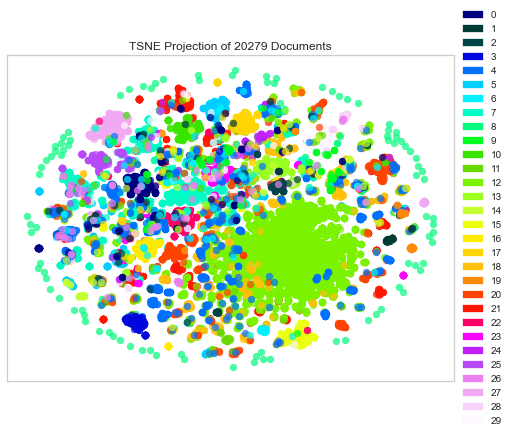

In [30]:
model, labels = mbkmeans_clusters(X, k_range=30)
df_clusters = pd.DataFrame({
    "text": titles_without_stop_words,
    "cluster": labels
})
tsne_viz(X, labels)

In [108]:
df_clusters[df_clusters['cluster'] == 4]['text'].to_list()

['niacin research internet',
 'worsen eye sight',
 'anybody buzzing zap sensation head',
 'sars-cov infection persistence throughout human body brain new nih study find',
 're-infection',
 'severe disease initial infection',
 'vitamin autoimmune disease',
 'scar',
 'top head',
 'scar case expect reach 100,000 day double vaccinate',
 'completely overwhelm cognitive problem grad student',
 'head pressure headache',
 'eye problem prism glass',
 'laugh cough',
 'supplement',
 'infection',
 'state funding research',
 'research development canadian panel',
 'dietary preference prior infection',
 'reassure air hunger',
 'problem maybe use suffering purpose convince others behave easter spar fate',
 'develop mouth problem',
 'sinus infection',
 'blurry vision pem',
 'scar death read news',
 'worsen nail fold skin change',
 'timeline recent infection',
 "anyone's hand eye coorindation improve throughout",
 'start back college wonder happen catch plus vaccinate worse',
 'dao supplement',
 'ekg c

In [84]:
df_clusters[df_clusters['cluster'] == 5]['text'].to_list()

['someone interpret longhaul cytokein antibody result',
 'vax reinfected antibody count',
 'antibody inquiry',
 'need antibody treatment study',
 'labcorp quantitative antibody',
 'without antibody',
 'elevated antibody',
 'regard antibody',
 'antibody vaccine breakthrough infection last',
 'theory good portion antibody',
 'elevate tbo antibody',
 'quantitative antibody',
 'negative antibody suspect',
 'antibody',
 'antibody',
 'cannot monoclonal antibody infusion',
 'someone explain aloud monoclonal antibody infusion',
 'antibody accurate guy think',
 'antibody remain detectable system',
 'antibody period time infection persistent virus theory',
 'possibility reinfection antibody',
 'try monoclonal antibody treatment',
 'negative antibody later retested positive',
 'quantify antibody',
 'antibody high epstein barr virus antibody mean explain chronic fatigue',
 'anybody antibody high result many month',
 'antibody presence five month',
 'antibody result',
 'high antibody',
 'neutralize

In [85]:
df_clusters[df_clusters['cluster'] == 18]['text'].to_list()

['multiple mri brain neck spine since',
 'neurological new symptkm',
 'story EMOT_JOY',
 'sars-cov infection persistence throughout human body brain new nih study find',
 'use nad',
 'stop smoke since',
 'story time',
 'aspirin',
 'leave sub without recovery story',
 'new onset dizziness vertigo lightheadedness scar something serious need support',
 'awhile since sub still haulin',
 'would new',
 'pneumonia',
 'consider sign petition publish new nice guideline mecfs',
 'severity accute',
 'family member expose scared',
 'hot forehead inflammation dysautonomia',
 'try black seed oil taurine decrease increased heart rate',
 'severe since august contact moral support well guide path recovery kosta',
 'find another way',
 'inflammation move',
 'black seed oil',
 'oil oregano',
 'belly laugh since',
 'cbg ldn',
 'new want share',
 'histamine inflammation',
 "healthy year old's shaggy dog story",
 'recovery success story need hope',
 'new study find evidence superhuman immunity individual',


In [111]:
df_clusters[df_clusters['cluster'] == 12]['text'].to_list()

['improve quite lot stop',
 'debilitate still suck relate',
 'drinking',
 'someone explain cure possible',
 'gi rumble noise',
 'resource thought fellow',
 'careful water kid',
 'vax',
 'different person',
 'multiple mri brain neck spine since',
 'video graphic bc007 mechanism',
 'study best clinical practice seminar replay sep 8) vax therapy neurology dysautonomia cardiology putrino labs mt sinai',
 'omega colchicine',
 'acid-refluxers rid acid re-flux',
 'distraction EMOT_JOY',
 'hair loss year',
 'mcas-type similar',
 'home hospital oxygen',
 'lazy bitch',
 'under-treating acute hauling',
 'lazy bitch',
 'dysautomnia coincidence',
 'burn muscle stiffness morning',
 'constipation',
 'might insane',
 'nuclear option mcas',
 'yet comb someone summarize',
 'sibo without major gut symtpoms',
 'theory immune system',
 'exertional malaise',
 'reoccurring rash',
 'throat closing',
 'rheumatology',
 'hop',
 'statin',
 "people report progress patterson's protocol",
 'stem cell discussion',
 '

##### Trying a larger number of clusters (elbow method not efficient)

Silhouette score:
0.015459844644993647


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

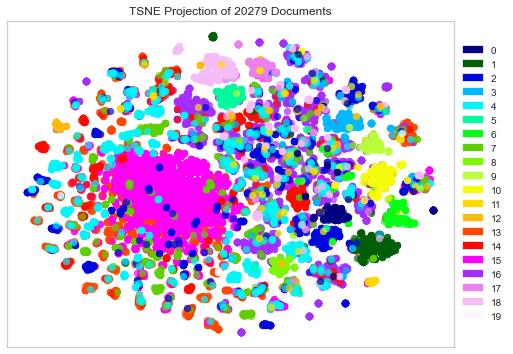

In [32]:
model, labels = mbkmeans_clusters(X, k_range=20)
df_clusters = pd.DataFrame({
    "text": titles_without_stop_words,
    "cluster": labels
})

tsne_viz(X, labels)

In [36]:
df_clusters[df_clusters['cluster'] == 11]['text'].to_list()

['high cpk total-serum low alt sgpt',
 'high calcium low potassium',
 'high prostaglandin',
 'high heart rate',
 'high ige level vaccine',
 'high liver enzyme',
 'high ferritin',
 'try high niacin protocol 1-2 per day',
 'high histamine food',
 'high heart rate randomly high',
 'pot high risk hospitalization',
 'high heart rate',
 'covid-related high blood pressure resolve time',
 'high ketone inflammation',
 'high basophil',
 'high dose mushroom experience',
 'high heart rate',
 'develope high blood pressure',
 'generally bad blood pressure high hour',
 'high heart rate return normal',
 'virus know high level prolactin woman',
 'vaccine maybe palpitation high hr chest pain',
 'high blood pressure hauling',
 'high dose',
 'high altitude trigger',
 'panic attack high heart rate month',
 'high heart rate able fee due worse',
 'panic attack anxiety high heart rate',
 'high blood pressure dizziness start',
 'high blood pressure',
 'high heart rate night sleep',
 'travel high altitude',
 'h

In [37]:
df_clusters[df_clusters['cluster'] == 5]['text'].to_list()

['update bloodwork',
 'update plz read',
 'month update',
 'twelve month year update',
 'vaccine update',
 'update negative still sick',
 'update patterson protocol',
 '3rd month update',
 'seven month update sleep etc',
 'update mountain',
 'update status',
 'update status',
 'refer clinic continue update',
 'niacin update',
 'update muscle twitching',
 'plus update',
 'positive four month update minor improvement',
 'month eight update',
 'update new 3rd infection',
 'update fifteen month mcas positive',
 'update longhaul theory',
 'infection update',
 'hematology update',
 'funny recovery story update',
 'update 2.5 week second pfizer dose mixed',
 'update hope recovery',
 'thirteen month update',
 'imagine day able instead health update',
 'shave head due hair loss-update',
 'ten month update overall better day',
 'eight month update',
 'update first moderna shot',
 'positive update',
 'update inability sleep',
 'update',
 'cent update',
 'poor vision update',
 'second day nicotini

In [38]:
df_clusters[df_clusters['cluster'] == 17]['text'].to_list()

['hyper pot',
 'anymones pot improve pot make nauseous',
 'curious experience ivabradine propranolol pot',
 'pot',
 'distinguish cf pot',
 'wonder pot',
 'recovery path pot',
 'chance pot actually myocarditis',
 'pot doctor cardio recommend resting follow pot protocol try active return work etc',
 'ssri helpful pot',
 'pot dysautonomia without cf pem',
 'cardiac mri pot diagnosis',
 'pot',
 'pot hypertension',
 'anybody significant improvement pot dysautonomia',
 'pot deconditioned',
 'pot deconditioned',
 'pot',
 'pot viral cf type',
 'head pressure pot',
 'possible pot',
 'pot',
 'something pot',
 'pot vaccine heartrate',
 'pregnant hauling pot',
 'pot disappear',
 'pot disappear',
 'pot sob',
 'pot',
 'diagnose pot',
 'orthostatic hypertension pot',
 'pot',
 'try pyridostigmine mestinon pot',
 'trade pot cf',
 'intermittent pot',
 'pot',
 'pot away',
 'dysautonomia pot',
 'vaccine pot cfs pem',
 'vaccine pot cfc pem',
 'pot relapse back',
 'pot anxiety suggestion manage',
 'morning 

### Word2vec + KMEANS

#### Custom Word2vec

In [1]:
# the vector size is a hyper parameter you should look into

In [17]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=titles_without_stop_words, vector_size=300)

In [16]:
vectorized_docs = vectorize(titles_without_stop_words, model=w2v_model)
len(vectorized_docs), len(vectorized_docs[0])

(20279, 300)

In [17]:
vectorized_docs_np_array = np.asarray(vectorized_docs)

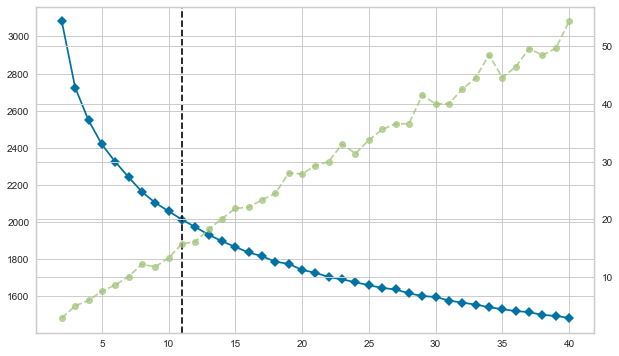

In [18]:
plot_elbow(vectorized_docs_np_array, k_range=range(2, 41))

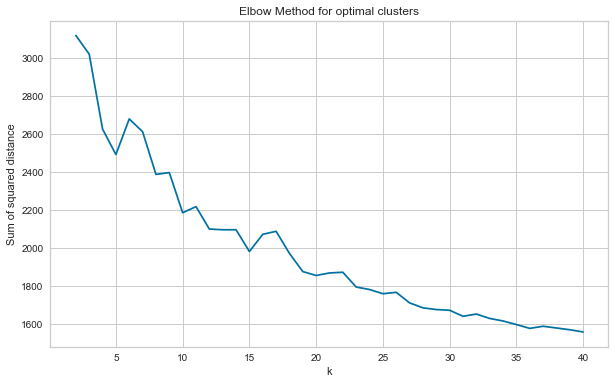

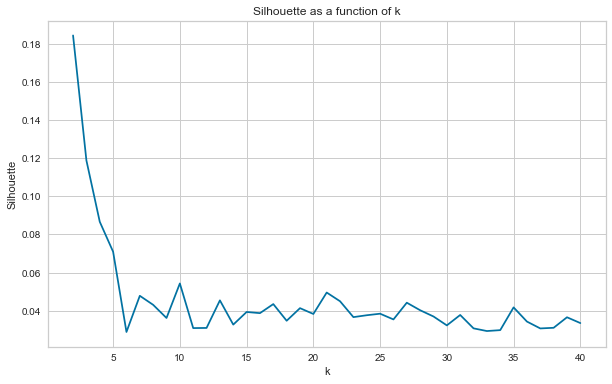

(MiniBatchKMeans(batch_size=1000, n_clusters=40, random_state=21),
 array([ 0, 19, 31, ..., 32, 19, 32]))

In [45]:
mbkmeans_clusters(vectorized_docs_np_array, k_range=range(2,41))

Silhouette score:
0.027760992


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

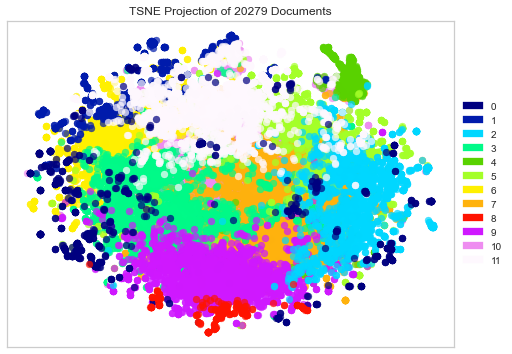

In [20]:
model, labels = mbkmeans_clusters(vectorized_docs_np_array, k_range=12)
df_clusters = pd.DataFrame({
    "text": titles_without_stop_words,
    "cluster": labels
})
tsne_viz(vectorized_docs_np_array, labels)

In [21]:
df_clusters[df_clusters['cluster'] == 9]['text'].to_list()

['know cause twitch tremor',
 'resource thought fellow',
 'careful water kid',
 'want life back',
 'hair loss year',
 'update bloodwork',
 'wish work job physical improvement',
 'bypass blood brain barrier',
 'hollow body weak muscle',
 'worse better',
 'blood clot',
 'anybody reaction allegra',
 'pain swell foot',
 'want know treat',
 'recovery follow-up',
 'bad day',
 'grow breathe move',
 'anybody worry doc ruin medical chart',
 'leave sub without recovery story',
 'day blink',
 'could',
 'difficulty swallow',
 'heart skip beat',
 'ok sub terrify',
 'kaiser doctor',
 'felt good recover week hit',
 'today say shit pre-workout play squash ready die tomorrow',
 'inflammatory marker',
 'prickly foot',
 'wake queasy',
 'shoulder someone try yank arm',
 'johson johnson aka janssen vaccine widely available area longhaulers try',
 'trouble wearing glass',
 "well search whatever here's make dysautonomia cf",
 'wonder pot',
 'scar death read news',
 'housebound bedbound',
 'today pcp acknowle

In [22]:
df_clusters[df_clusters['cluster'] == 0]['text'].to_list()

['better',
 'rheumatology',
 'hop',
 'delta',
 'cleanse',
 'say',
 'hyperpots',
 'sad',
 'pot',
 'surreal',
 'headache',
 'supplement',
 'inhale spasm',
 'sulforaphane',
 'elevate heartrate',
 'headache',
 'relapse',
 'october',
 'oxygen',
 'better',
 'age',
 'toe',
 'serrapeptase-natokinase',
 'bother',
 'supplement',
 'date',
 'postmenopausal bleed',
 'eat',
 'headache',
 'shortness breath',
 'parosmia',
 'headache',
 'therapist',
 'mcas',
 'strange',
 'smell',
 'eyesight',
 'symptoms',
 'shot',
 'resolved longhaulers',
 'parasite',
 'booster',
 'hey',
 'breath',
 'hypochondriac',
 'normal',
 'mcas',
 'relapse',
 'appendectomy',
 'oxygen',
 'constant headache',
 'antidepressant',
 'possible',
 'alkaline phosphatase',
 'better',
 'crash',
 'sleep',
 'shakiness heartbeat',
 'pot',
 'hypertension',
 'supplement salt',
 'pot hypertension',
 'svt',
 'stress',
 'sleep',
 'app',
 'potential',
 'phantosmia',
 'story',
 'stone',
 'heart',
 'love',
 'supplementation',
 'stomach',
 'gastropares

In [24]:
df_clusters[df_clusters['cluster'] == 2]['text'].to_list()

['brain fog',
 'mental health',
 'thought treatment medication ampligen',
 'pulmonologist want give dexamethasone thought',
 'burn muscle stiffness morning',
 'might insane',
 'sibo without major gut symtpoms',
 'throat closing',
 'statin',
 'general consensus longhauls last',
 'neurologist suggest migraine pot think fit',
 'doctor acknowledge longhauling',
 'treatment brain fog fatigue',
 'nighttime weakness',
 'deal weird aggressive thought',
 'follow neurologist',
 'brown phlegm morning',
 'jaw tooth pain night',
 'high calcium low potassium',
 'mental health',
 'longest',
 'pem longhauler',
 'sound beginning',
 'brain fog',
 'forget breath constant flight fight mode',
 'fast',
 'abdominal tightness',
 'neuro symptoms fatigue',
 'mental health',
 'information mother adult daughter',
 'noisy stomach',
 'brain fog sometimes vanish',
 'flu shot',
 'everything right still',
 'mother ing saga continue',
 'laugh cough',
 'thank god',
 'constant lump sensation throat',
 'swollen gland',
 '

#### Pretrained Word2vec

In [18]:
import gensim.downloader as api

w2v_model_pretrained = api.load('word2vec-google-news-300')

In [19]:
vectorized_docs = vectorize(titles_without_stop_words, model=w2v_model_pretrained)
vectorized_docs_np_array = np.asarray(vectorized_docs)
len(vectorized_docs), len(vectorized_docs[0])

(20279, 300)

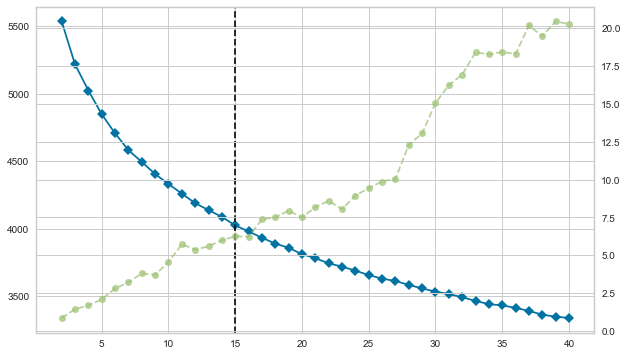

In [20]:
plot_elbow(vectorized_docs_np_array, k_range=range(2, 41))

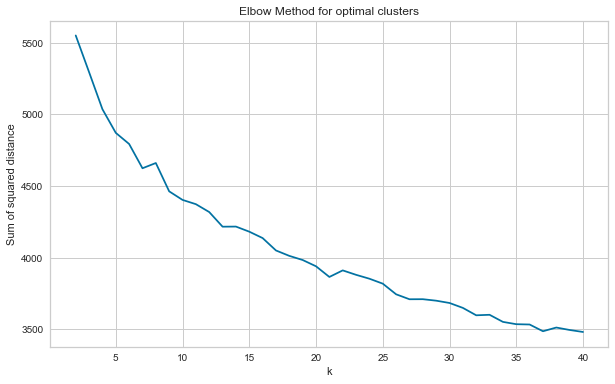

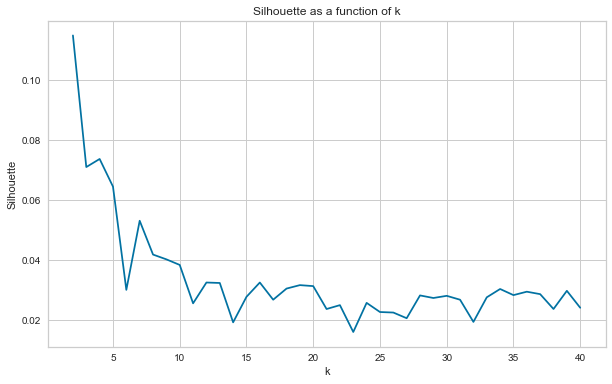

(MiniBatchKMeans(batch_size=1000, n_clusters=40, random_state=21),
 array([36, 15, 11, ...,  9, 28, 20]))

In [21]:
mbkmeans_clusters(vectorized_docs_np_array, k_range=range(2,41))

Silhouette score:
0.027760405


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

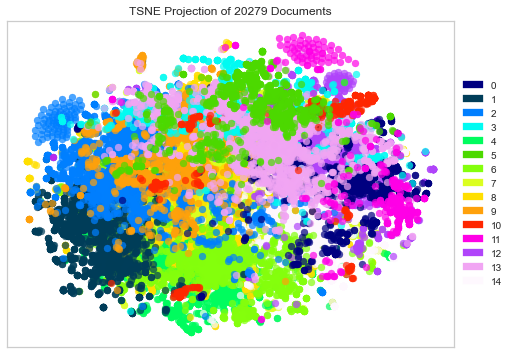

In [22]:
model, labels = mbkmeans_clusters(vectorized_docs_np_array, k_range=15)
df_clusters = pd.DataFrame({
    "text": titles_without_stop_words,
    "cluster": labels
})

tsne_viz(vectorized_docs_np_array, labels)

In [160]:
df_clusters[df_clusters['cluster'] == 11]['text'].to_list()

['statin',
 'say',
 'fast',
 'itchy tattoo mcas',
 'arthritis',
 'without antibody',
 'cannot stay upright',
 'mri contrast',
 'mistrust doctor',
 'study',
 'want static away',
 'still',
 'statistic',
 'sinusitis',
 'start acute',
 'start bout',
 'update status',
 'update status',
 'shot',
 'tinnitus',
 'hr lady butt',
 'gut palpitation',
 'still',
 'twitch',
 'throat tightness',
 'tinnitus sound',
 'tinnitus',
 'sinus tooth pain',
 'svt',
 'fault',
 'story',
 'twitching last',
 'situation',
 'start sweat',
 'tinnitus',
 'sob start month',
 'tinnitus',
 'worst part',
 'try',
 'rant',
 'tinnitus away',
 'constant dry throat',
 'start month',
 'tooth',
 'tip',
 'worst',
 'asthma',
 'bad taste throat',
 'h2 antagonist',
 'uti',
 'tinnitus last month',
 'artist',
 'think mutation',
 'list',
 'thought fast',
 'bad tinnitus',
 'stupid',
 'situation sound',
 'worst',
 'twitch',
 'put',
 'day thirty',
 'think asymptomatic patient',
 'vit night sweat',
 'attribute air trap',
 'statin',
 'cannot

In [161]:
df_clusters[df_clusters['cluster'] == 2]['text'].to_list()

['er last night despite recover five month',
 'vax',
 'constant headache pfizer vaccine',
 'vaccine birthday nervous need positive vaccine story',
 'gout flareup possible side effect vaccine',
 'vaccine twice',
 'think improve',
 'rest recovery vaccine',
 'deal weird aggressive thought',
 'vaccine improvement',
 'vaccine rent',
 'spider vein varicose vein',
 'ebv reactivation',
 'vax reinfected antibody count',
 'five year old daughter positive',
 'viral recovery story',
 'antihistamine advice',
 'uedvt',
 'heavy feeling body',
 'vaccine',
 'recover anxiety adrenaline panic attack',
 'vaccine recovery',
 'path full recovery part five remain chronic tension headache visual snow',
 'vaccine booster',
 'prescribe amoxicillin without negative side effect',
 'activism america',
 'give anxiety panic attack depression',
 'find decent doctor deal metlife disability',
 'leave sub without recovery story',
 'time improve',
 'mitral valve',
 'deserve assistance medicaid',
 'determine whether relat

In [162]:
df_clusters[df_clusters['cluster'] == 4]['text'].to_list()

['much exercise',
 'little better everyday',
 'mental health',
 'weirdest neuro deal',
 'tempt end eat banana',
 'better',
 'tip ease oedema pain leg ankles foot',
 'extreme fatigue',
 'mild case back december two thousand twenty seven month later believe experience nowhere',
 'extreme kneecap pain weakness month',
 'elevated inflammatory marker',
 'experience dimentia',
 'delta',
 'worse better',
 'reinfected',
 'deal cluster headache migraine',
 'exercise fuck heart',
 'egg taste terrible',
 'mental health',
 'grow breathe move',
 'wheeze cause difficulty breathe sleep',
 'experience attempt apheresis',
 'ever better',
 'pretend improve hate let',
 'alternative chinese medicine',
 'mental health',
 'deal extreme bloating',
 'heart skip beat',
 'felt good recover week hit',
 'sometimes cannot believe reality',
 'remember laugh little',
 'high heart rate',
 'effective treatment',
 'self-treatment',
 'experience erectile dysfunction',
 'timeline recent infection',
 'reinfection rate',
 